In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import *
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score


df = pd.read_csv("Simulation_Outputs_sp", delimiter="\t")
Occupancy = pd.read_csv("Occupancy_per_hour", delimiter="\t")
df2=pd.read_csv("consommation_cool_sp")

In [2]:
df

,TIME,Temperature_ext_C,Temperature_int_C,Temperature_op_C,QHeat_kJ_h,QCool_kJ_h,Unnamed: 6
0,1.0,10.70,20.000000,20.000000,0.000000,0.0,NaN
1,2.0,11.05,19.500000,19.675017,338.417281,0.0,NaN
2,3.0,11.30,19.111769,19.437649,0.000000,0.0,NaN
3,4.0,11.15,19.111769,19.404694,55.525576,0.0,NaN
4,5.0,11.05,19.000000,19.313355,23.949079,0.0,NaN
...,...,...,...,...,...,...,...
8755,8756.0,6.45,20.734648,21.275721,0.000000,0.0,NaN
8756,8757.0,5.70,20.430615,21.027335,0.000000,0.0,NaN
8757,8758.0,4.90,20.254221,20.849430,0.000000,0.0,NaN
8758,8759.0,4.10,19.988122,20.624979,0.000000,0.0,NaN


In [3]:
col_2 = df.iloc[:, 1].values
col_3 = df.iloc[:, 2].values
temp_ext= pd.DataFrame(col_2.reshape(-1, 24))
temp_ext_int = pd.DataFrame(np.hstack((col_2.reshape(-1, 24), col_3.reshape(-1, 24))))
col_2_occ = Occupancy.iloc[:, 1].values
Occupancy=  pd.DataFrame(col_2_occ.reshape(-1, 24))
temp_ext_int_occ = pd.DataFrame(np.hstack((col_2.reshape(-1, 24), col_3.reshape(-1, 24), col_2_occ.reshape(-1, 24))))



In [4]:
temp_ext_int["clusters"]=df2["clusters"]
temp_ext_int_occ["clusters"]=df2["clusters"]
temp_ext["clusters"]=df2["clusters"]

In [5]:
def standardize_data(X):
    scaler = StandardScaler()
    return scaler.fit_transform(X)

In [6]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "SVC": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

In [7]:
import time

def evaluate_models_split(X_train, X_test, y_train, y_test, models):
    results = {}
    
    for name, model in models.items():
        print(f"\n Évaluation de {name} avec train_test_split...")

       
        start_time = time.time()
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        
        execution_time = time.time() - start_time

        cm = confusion_matrix(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        accuracy = accuracy_score(y_test, y_pred) 

        results[name] = {
            "f1_score": f1, 
            "accuracy": accuracy, 
            "execution_time (s)": execution_time
        }
        
        plt.figure(figsize=(5,4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
        plt.xlabel('Prédictions')
        plt.ylabel('Vraies classes')
        plt.title(f'Matrice de confusion - {name}')
        plt.show()
        
        print(f"{name} - Accuracy: {accuracy:.4f} - F1 Score: {f1:.4f} - Temps d'exécution: {execution_time:.4f} sec")
        print("###################################################################")
    
    return results


In [10]:
import time
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

def evaluate_models_cv(X, y, models, cv=4):
    results = {}

    for name, model in models.items():
        print(f"\n Évaluation de {name} avec Cross Validation ({cv}-folds)...")
        
        
        start_time = time.time()

        scoring = ["accuracy", "f1_weighted"]
        scores = {}

        for metric in scoring:
            score = cross_val_score(model, X, y, cv=StratifiedKFold(n_splits=cv, shuffle=True, random_state=42), scoring=metric)
            scores[metric] = np.mean(score)
        
       
        execution_time = time.time() - start_time
        results[name] = scores
        results[name]["execution_time (s)"] = execution_time

        print(f"{name} - Accuracy: {scores['accuracy']:.4f} - F1 Score: {scores['f1_weighted']:.4f} - Temps d'exécution: {execution_time:.4f} sec")
        print("###################################################################")

    return results


*************************************************Prédiction en fonction de TEXT avec 4 clusters en spain*************************************************

 Évaluation de Random Forest avec train_test_split...


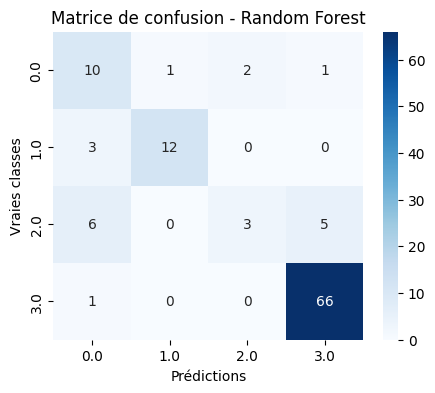

Random Forest - Accuracy: 0.8273 - F1 Score: 0.8104 - Temps d'exécution: 0.2644 sec
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


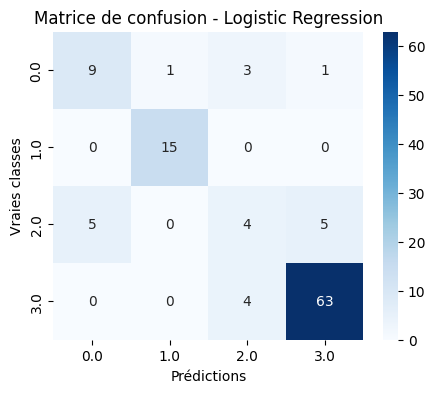

Logistic Regression - Accuracy: 0.8273 - F1 Score: 0.8188 - Temps d'exécution: 0.3361 sec
###################################################################

 Évaluation de SVC avec train_test_split...


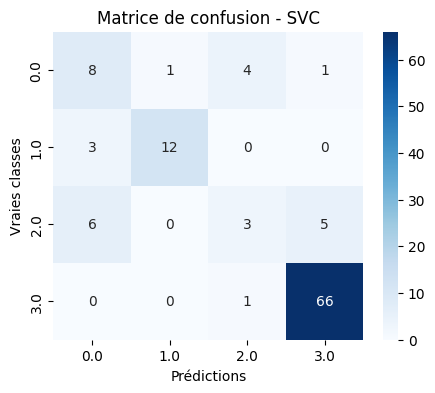

SVC - Accuracy: 0.8091 - F1 Score: 0.7957 - Temps d'exécution: 0.0089 sec
###################################################################

 Évaluation de KNN avec train_test_split...


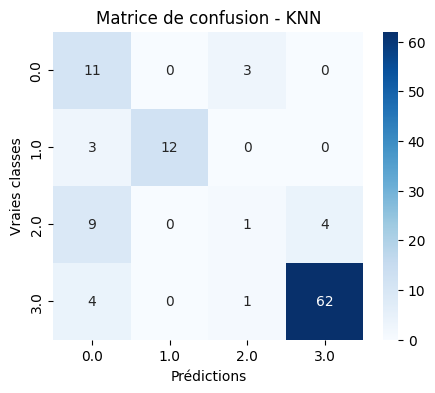

KNN - Accuracy: 0.7818 - F1 Score: 0.7708 - Temps d'exécution: 0.2630 sec
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


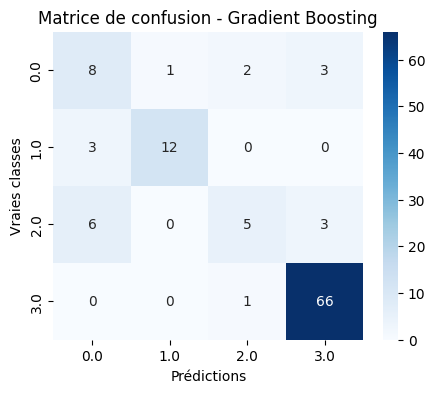

Gradient Boosting - Accuracy: 0.8273 - F1 Score: 0.8188 - Temps d'exécution: 1.2899 sec
###################################################################


In [9]:
print("*************************************************Prédiction en fonction de TEXT avec 4 clusters en spain*************************************************")
X=temp_ext.drop(columns=["clusters"])
y=temp_ext["clusters"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)
results_split = evaluate_models_split(  X_train, X_test, y_train, y_test, models)

In [11]:
print("*************************************************Prédiction en fonction de TEXT avec 4 clusters*************************************************")
X_norm=standardize_data(X)
results_cv = evaluate_models_cv(X_norm, y, models, cv=4)

*************************************************Prédiction en fonction de TEXT avec 4 clusters*************************************************

 Évaluation de Random Forest avec Cross Validation (4-folds)...
Random Forest - Accuracy: 0.7616 - F1 Score: 0.7570 - Temps d'exécution: 1.6984 sec
###################################################################

 Évaluation de Logistic Regression avec Cross Validation (4-folds)...
Logistic Regression - Accuracy: 0.7915 - F1 Score: 0.7823 - Temps d'exécution: 0.1744 sec
###################################################################

 Évaluation de SVC avec Cross Validation (4-folds)...
SVC - Accuracy: 0.7588 - F1 Score: 0.7459 - Temps d'exécution: 0.0885 sec
###################################################################

 Évaluation de KNN avec Cross Validation (4-folds)...
KNN - Accuracy: 0.7616 - F1 Score: 0.7615 - Temps d'exécution: 0.0356 sec
###################################################################

 Évaluation de

**********************************************Prédiction en fonction de TEXT et TINT avec 4 clusters en spain **********************************************

 Évaluation de Random Forest avec train_test_split...


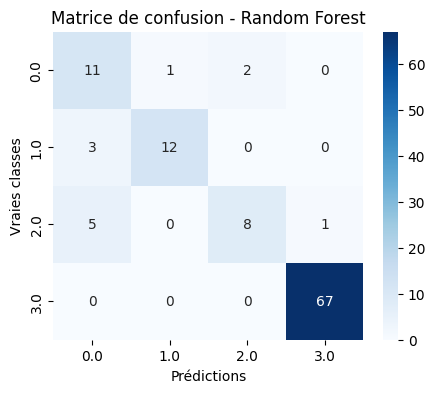

Random Forest - Accuracy: 0.8909 - F1 Score: 0.8912 - Temps d'exécution: 0.2375 sec
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


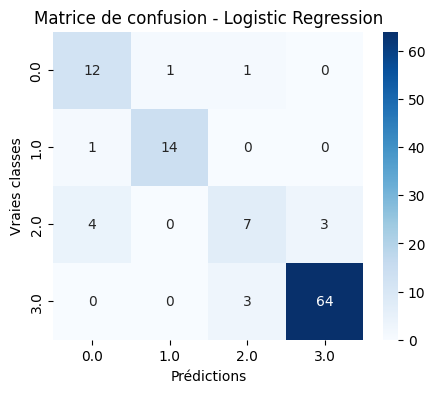

Logistic Regression - Accuracy: 0.8818 - F1 Score: 0.8789 - Temps d'exécution: 0.4066 sec
###################################################################

 Évaluation de SVC avec train_test_split...


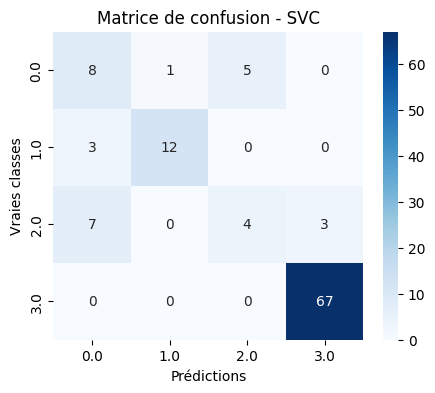

SVC - Accuracy: 0.8273 - F1 Score: 0.8205 - Temps d'exécution: 0.0086 sec
###################################################################

 Évaluation de KNN avec train_test_split...


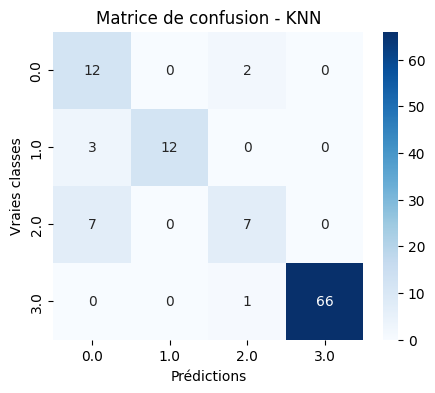

KNN - Accuracy: 0.8818 - F1 Score: 0.8848 - Temps d'exécution: 0.0108 sec
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


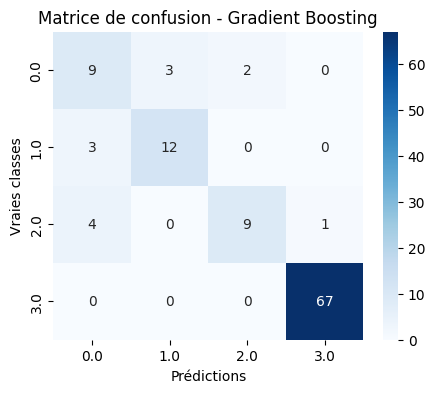

Gradient Boosting - Accuracy: 0.8818 - F1 Score: 0.8817 - Temps d'exécution: 2.0631 sec
###################################################################


In [17]:
print("**********************************************Prédiction en fonction de TEXT et TINT avec 4 clusters en spain **********************************************")
X=temp_ext_int.drop(columns=["clusters"])
y=temp_ext_int["clusters"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)
results_split = evaluate_models_split(  X_train, X_test, y_train, y_test, models)

In [13]:
print("**********************************************Prédiction en fonction de TEXT et TINT avec 4 clusters**********************************************")
X_norm=standardize_data(X)
results_cv = evaluate_models_cv(X_norm, y, models, cv=4)

**********************************************Prédiction en fonction de TEXT et TINT avec 4 clusters**********************************************

 Évaluation de Random Forest avec Cross Validation (4-folds)...
Random Forest - Accuracy: 0.9123 - F1 Score: 0.9119 - Temps d'exécution: 1.6128 sec
###################################################################

 Évaluation de Logistic Regression avec Cross Validation (4-folds)...
Logistic Regression - Accuracy: 0.9204 - F1 Score: 0.9196 - Temps d'exécution: 0.5222 sec
###################################################################

 Évaluation de SVC avec Cross Validation (4-folds)...
SVC - Accuracy: 0.8327 - F1 Score: 0.8282 - Temps d'exécution: 0.0625 sec
###################################################################

 Évaluation de KNN avec Cross Validation (4-folds)...
KNN - Accuracy: 0.8794 - F1 Score: 0.8787 - Temps d'exécution: 0.0480 sec
###################################################################

 Évaluation 

*******************************************Prédiction en fonction de TEXT et TINT et occupation avec 4 clusters en spain *******************************************

 Évaluation de Random Forest avec train_test_split...


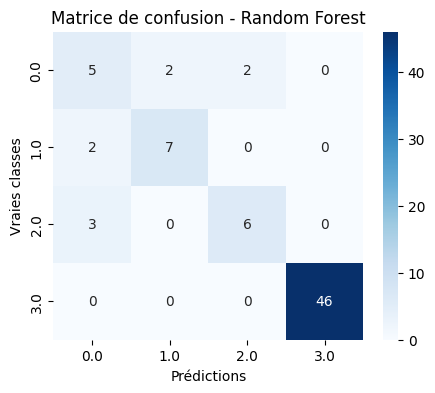

Random Forest - Accuracy: 0.8767 - F1 Score: 0.8779 - Temps d'exécution: 0.2273 sec
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


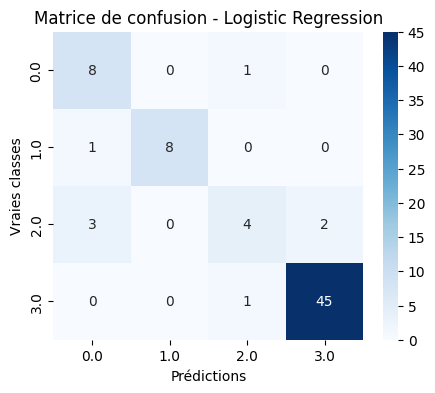

Logistic Regression - Accuracy: 0.8904 - F1 Score: 0.8855 - Temps d'exécution: 0.4174 sec
###################################################################

 Évaluation de SVC avec train_test_split...


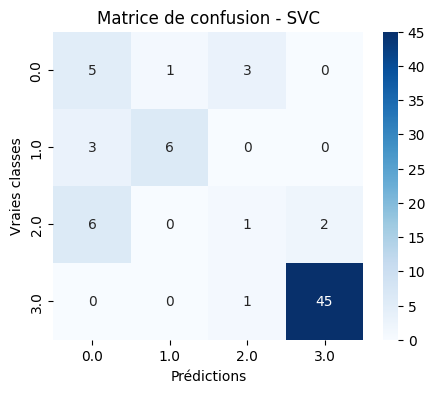

SVC - Accuracy: 0.7808 - F1 Score: 0.7735 - Temps d'exécution: 0.0129 sec
###################################################################

 Évaluation de KNN avec train_test_split...


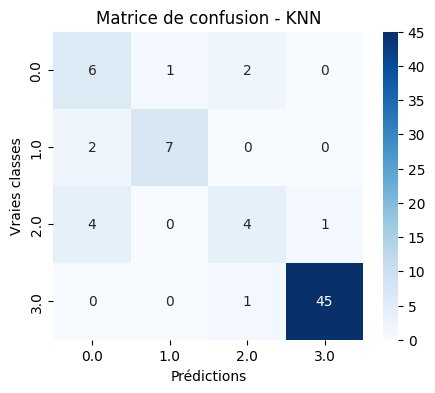

KNN - Accuracy: 0.8493 - F1 Score: 0.8501 - Temps d'exécution: 0.0110 sec
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


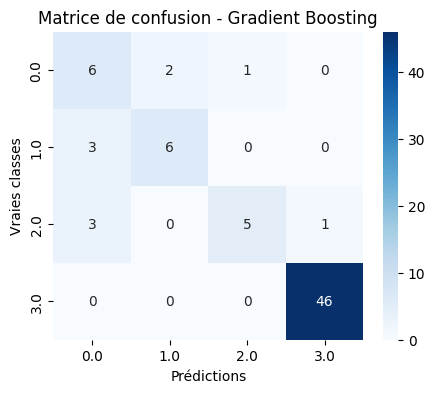

Gradient Boosting - Accuracy: 0.8630 - F1 Score: 0.8630 - Temps d'exécution: 2.1492 sec
###################################################################


In [14]:
print("*******************************************Prédiction en fonction de TEXT et TINT et occupation avec 4 clusters en spain *******************************************")
X=temp_ext_int_occ.drop(columns=["clusters"])
y=temp_ext_int_occ["clusters"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)
results_split = evaluate_models_split(  X_train, X_test, y_train, y_test, models)

In [15]:
print("*******************************************Prédiction en fonction de TEXT et TINT  et occupation avec 4 clusters en spain *******************************************")
X_norm=standardize_data(X)
results_cv = evaluate_models_cv(X_norm, y, models, cv=4)

*******************************************Prédiction en fonction de TEXT et TINT  et occupation avec 4 clusters en spain *******************************************

 Évaluation de Random Forest avec Cross Validation (4-folds)...
Random Forest - Accuracy: 0.9150 - F1 Score: 0.9142 - Temps d'exécution: 1.8727 sec
###################################################################

 Évaluation de Logistic Regression avec Cross Validation (4-folds)...
Logistic Regression - Accuracy: 0.8903 - F1 Score: 0.8899 - Temps d'exécution: 0.5853 sec
###################################################################

 Évaluation de SVC avec Cross Validation (4-folds)...
SVC - Accuracy: 0.8245 - F1 Score: 0.8201 - Temps d'exécution: 0.0739 sec
###################################################################

 Évaluation de KNN avec Cross Validation (4-folds)...
KNN - Accuracy: 0.8411 - F1 Score: 0.8412 - Temps d'exécution: 0.0337 sec
##############################################################

In [19]:

model_1 = RandomForestClassifier(n_estimators=100, random_state=42)
model_2 = GradientBoostingClassifier(n_estimators=100, random_state=42)


In [23]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier


In [20]:
meta_model = LogisticRegression()

In [24]:
stacking_model = StackingClassifier(
    estimators=[('rf', model_1), ('gb', model_2)], 
    final_estimator=meta_model
)

In [25]:
stacking_model.fit(X_train, y_train)

StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(random_state=42))],
                   final_estimator=LogisticRegression())

In [26]:
y_pred = stacking_model.predict(X_test)

In [29]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
f1 = f1_score(y_test, y_pred, average='weighted') 
print(f"F1-score: {f1}")

Accuracy: 0.8909090909090909
F1-score: 0.8911795897424373


In [35]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    
    "SVC": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

In [41]:
estimators = [(name, model) for name, model in models.items()]

meta_model = LogisticRegression(random_state=42)


stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=meta_model
)



In [42]:
stacking_model.fit(X_train, y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(random_state=42)),
                               ('SVC', SVC(random_state=42)),
                               ('KNN', KNeighborsClassifier()),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(random_state=42))],
                   final_estimator=LogisticRegression(random_state=42))

In [44]:
y_pred = stacking_model.predict(X_test)

In [45]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score: {f1}")

Accuracy: 0.9
F1-score: 0.900598605098605
